# Modeling & Analysis

### Jump to content:
- [Read in Keto + Nutrition Submissions data](#Read-in-Keto-+-Nutrition-Submissions-data)
- [Lemmatizing 'selftext'](#Lemmatize-words-before-analysis)
- [Subreddit EDA](#Subreddit-EDA)
- [Modeling](#Modeling)
    - Binarizing Target variable
    - Train / Test / Split
    - Models Tested + Interpretations:
        - [Multinomial Naive Bayes w/ CountVectorizer](#Multinomial-Naive-Bayes-w/-CountVectorizer)
        - [Multinomial Naive Bayes w/ TfidfVectorizer](#Multinomial-Naive-Bayes-w/-TfidfVectorizer)
        - [Logistic Regression w/ CountVectorizer](#Logistic-Regression-Naive-Bayes-w/-CountVectorizer)
        - [Logistic Regression w/ TfidfVectorizer <-- (BEST MODEL)](#Logistic-Regression-w/-TfidfVectorizer-(BEST-MODEL))
        - [Random Forest Classifier w/ CountVectorizer](#Random-Forest-w/-Naive-Bayes-w/-CountVectorizer)
- [Conclusion](#Conclusion)
- [Recommendations](#Recommendations)
- [Future Project Refinements](#Future-Project-Refinements)

### Import necessary packages

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import spacy

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.inspection import permutation_importance

from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, recall_score, precision_score, f1_score


### Read in Keto + Nutrition Submissions data

In [2]:
keto = pd.read_csv('data/keto_subs.csv')
nutrition = pd.read_csv('data/nutrition_subs.csv')

In [4]:
keto.head()

,subreddit,title,selftext
0,keto,Can stress kick you out of keto? Cortisol ques...,So I've been losing a steady 4 lbs a week for ...
1,keto,down almost 20 lbs before and after pics (slig...,"I'm 23, and 5'6. I was someone who struggled w..."
2,keto,Pulsatile tinnitus and Keto,"I have been doing Keto for around 10 weeks, ha..."
3,keto,Does Keto Work? (Emphatic Yes),Preface - Over 50 Soldier here. (Male)\n\nDepl...
4,keto,Homemade meal replacement type shake recipe thing,I really struggle to get enough calories in on...


In [5]:
nutrition.head()

,subreddit,title,selftext
0,nutrition,Can diet soda/sugar alcohols cause water reten...,Can food replacements for “bad” food lead to w...
1,nutrition,What is the healthiest way to drink alcohol?,"So, alcohol is not something you want as part ..."
2,nutrition,calcium RDI - how would you achieve this figur...,dairy has gotten a bad rap for its saturated f...
3,nutrition,Are there nutritional drawbacks to eating too ...,Hey r/nutrition. I’m a newbie in this field bu...
4,nutrition,You think vega one have all essential vitamins?,Looking for that extra protein powder with som...


#### Look at a 'selftext' example to see if any further cleaning needs to be done

In [6]:
# keto

keto['selftext'][9]

'Hello all!\n\nI’m on a coffee creamer hunt! Everything that I’ve tried  either tastes amazing, but has horrible inflammatory ingredients OR has amazing ingredients, but taste like cardboard! I’ve spent hundreds trying out new products and it’s making my pockets hurt. Not to mention how wasteful it is :(\n\nI’m looking for a liquid creamer with “clean” ingredients, but that tastes great! Thanks! :)'

In [3]:
# remove '\n' in selftext with .replace

keto['selftext'] = keto['selftext'].str.replace('\n', ' ')

In [8]:
# ensure keto selftext is cleaned

keto['selftext'][9]

'Hello all!  I’m on a coffee creamer hunt! Everything that I’ve tried  either tastes amazing, but has horrible inflammatory ingredients OR has amazing ingredients, but taste like cardboard! I’ve spent hundreds trying out new products and it’s making my pockets hurt. Not to mention how wasteful it is :(  I’m looking for a liquid creamer with “clean” ingredients, but that tastes great! Thanks! :)'

In [9]:
# nutrition

nutrition['selftext'][2]

'dairy has gotten a bad rap for its saturated fats.\n\nas a concussion sufferer I was told to stay away from dairy. I realized that I was not close to the RDI for calcium for years though. as such I started drinking milk again.\n\nafter looking at the calcium content for foods like salmon - which I eat a few times a week - it comes no where close to that of milk. salmon seems to be one of the foods highest in calcium after dairy. this suggests to me its very hard to hit the RDI for calcium without consuming dairy.\n\ncalcium supplements are said to be bad for the heart.\n\ncalcium is also required for the synthesis of vitamin d. \n\nim left consuming milk. im not asking - and have not decided yet - if milk is bad (although I am curious if you were to have an opinion on that). I am asking how would one achieve calcium RDI without dairy and calcium supplements. it seems impossible.'

In [4]:
# remove '\n' in selftext with .replace

nutrition['selftext'] = nutrition['selftext'].str.replace('\n', ' ')

In [11]:
# ensure nutrition selftext is cleaned

nutrition['selftext'][2]

'dairy has gotten a bad rap for its saturated fats.  as a concussion sufferer I was told to stay away from dairy. I realized that I was not close to the RDI for calcium for years though. as such I started drinking milk again.  after looking at the calcium content for foods like salmon - which I eat a few times a week - it comes no where close to that of milk. salmon seems to be one of the foods highest in calcium after dairy. this suggests to me its very hard to hit the RDI for calcium without consuming dairy.  calcium supplements are said to be bad for the heart.  calcium is also required for the synthesis of vitamin d.   im left consuming milk. im not asking - and have not decided yet - if milk is bad (although I am curious if you were to have an opinion on that). I am asking how would one achieve calcium RDI without dairy and calcium supplements. it seems impossible.'

### Concat Keto + Nutrition Subreddit Submissions

In [5]:
submissions = pd.concat([keto, nutrition], ignore_index = True)

In [13]:
submissions.head()

,subreddit,title,selftext
0,keto,Can stress kick you out of keto? Cortisol ques...,So I've been losing a steady 4 lbs a week for ...
1,keto,down almost 20 lbs before and after pics (slig...,"I'm 23, and 5'6. I was someone who struggled w..."
2,keto,Pulsatile tinnitus and Keto,"I have been doing Keto for around 10 weeks, ha..."
3,keto,Does Keto Work? (Emphatic Yes),Preface - Over 50 Soldier here. (Male) Deploy...
4,keto,Homemade meal replacement type shake recipe thing,I really struggle to get enough calories in on...


In [6]:
# double check for nulls

submissions.isna().sum()

subreddit    0
title        0
selftext     2
dtype: int64

In [6]:
# drop nulls

submissions.dropna(inplace = True)

In [8]:
# ensure nulls are dropped

submissions.isna().sum()

subreddit    0
title        0
selftext     0
dtype: int64

----

### Lemmatize words before analysis
- Thought process: Get the root words of each selftext so that the models don't double-count words, such as 'eat', 'eats', 'eating'; 'carbs' and 'carb'

In [7]:
nlp = spacy.load("en_core_web_sm")

In [8]:
def my_lemmatizer(submission):
    """
    This function takes an extry and returns a lemmatized / root-word version.
    """
    doc = nlp(submission)
    sub_lemma = [word.lemma_ for word in doc]
    return " ".join(sub_lemma)

In [31]:
# pre-lemmatized text

submissions['selftext'][7]

"Are the diuretic effects of keto dangerous for a dialysis patient? I'm a 4  years in on keto, one and a half of those being zerocarb, so I'm well aware of the need for increased electrolytes. I just have a really bad feeling about mixing keto and dialysis. The internet articles I have read suggest keto would be a bad idea. I generally agree. Anyone on here think otherwise?  I'm looking to make a diet for my type 2 diabetic father on dialysis. Meal planning is pretty difficult because of the decreased phosphorous, potassium, and sodium allowed.  Thanks in advance."

In [42]:
# example lemmatized text with lemmatize function

my_lemmatizer(submissions['selftext'][7])

'be the diuretic effect of keto dangerous for a dialysis patient ? I be a 4   year in on keto , one and a half of those be zerocarb , so I be well aware of the need for increase electrolyte . I just have a really bad feeling about mix keto and dialysis . the internet article I have read suggest keto would be a bad idea . I generally agree . anyone on here think otherwise ?   I be look to make a diet for my type 2 diabetic father on dialysis . meal planning be pretty difficult because of the decrease phosphorous , potassium , and sodium allow .   thank in advance .'

In [9]:
# referenced Group 4's NLP Hackathon code
# creating a lemmatized column of 'selftext', so it'll harmonize well with CountVectorizer + TfidfVectorizer in our modeling

submissions['clean_selftext'] = submissions['selftext'].map(my_lemmatizer)

In [11]:
submissions.head()

,subreddit,title,selftext,clean_selftext
0,keto,Can stress kick you out of keto? Cortisol ques...,So I've been losing a steady 4 lbs a week for ...,so I 've be lose a steady 4 lb a week for the ...
1,keto,down almost 20 lbs before and after pics (slig...,"I'm 23, and 5'6. I was someone who struggled w...","I be 23 , and 5'6 . I be someone who struggle ..."
2,keto,Pulsatile tinnitus and Keto,"I have been doing Keto for around 10 weeks, ha...","I have be do Keto for around 10 week , have lo..."
3,keto,Does Keto Work? (Emphatic Yes),Preface - Over 50 Soldier here. (Male) Deploy...,preface - over 50 soldier here . ( Male ) de...
4,keto,Homemade meal replacement type shake recipe thing,I really struggle to get enough calories in on...,I really struggle to get enough calorie in on ...


---

## Subreddit EDA

### Top 10 most common words in the 'Keto' subreddit

In [52]:
# referenced Lesson 5.04 - NLP 1

keto_cvect = CountVectorizer(stop_words = stop_words)
keto_vect = keto_cvect.fit_transform(submissions[submissions['subreddit'] == 'keto']['clean_selftext'])
keto_dtm = pd.DataFrame(keto_vect.toarray(), columns = keto_cvect.get_feature_names())

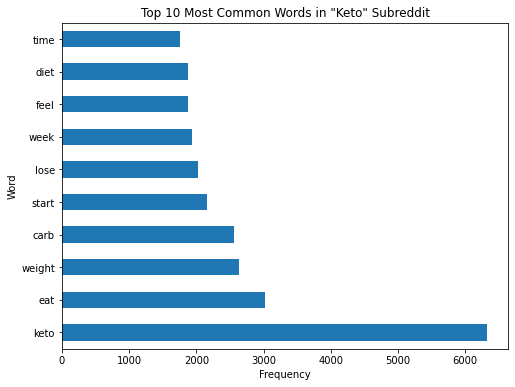

In [53]:
plt.figure(figsize=(8,6))
keto_dtm.sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.title('Top 10 Most Common Words in "Keto" Subreddit')
plt.xlabel('Frequency')
plt.ylabel('Word');

**-->** Top 3 words in r/Keto: keto, eat, weight
- All words are associated with people's keto experience - especially 'feel', which I think is interesting
- Other words not surprising to see- weight, lose, carb
- 'diet' and 'eat' are also present in r/Nutrition

### Top 10 most common words in the 'Nutrition' subreddit

In [54]:
# referenced Lesson 5.04 - NLP 1

nutrition_cvect = CountVectorizer(stop_words = stop_words)
nutrition_vect = nutrition_cvect.fit_transform(submissions[submissions['subreddit'] == 'nutrition']['clean_selftext'])
nutrition_dtm = pd.DataFrame(nutrition_vect.toarray(), columns = nutrition_cvect.get_feature_names())

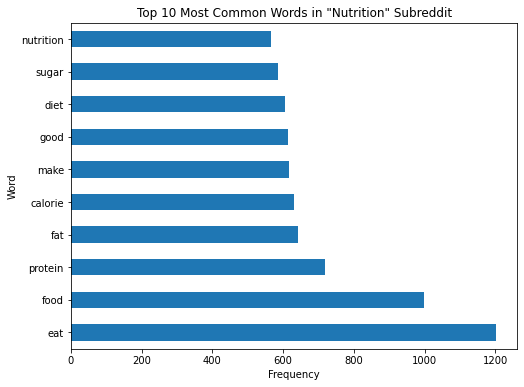

In [55]:
plt.figure(figsize=(8,6))
nutrition_dtm.sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.title('Top 10 Most Common Words in "Nutrition" Subreddit')
plt.xlabel('Frequency')
plt.ylabel('Word');

**-->** Top 3 words in r/Nutrition: eat, food, protein
- Interesting to see 'make' in the top words- perhaps people are looking for healthy homemade recipes
- Other health-conscious words in the top- protein, calorie, diet, sugar
- 'diet' and 'eat' are also present in r/Keto

### Top 10 most common words in the combined subreddits

In [45]:
# referenced Lesson 5.04 - NLP 1

cvect = CountVectorizer(stop_words = 'english')
subs_vect = cvect.fit_transform(submissions['clean_selftext'])
dtm = pd.DataFrame(subs_vect.toarray(), columns = cvect.get_feature_names())

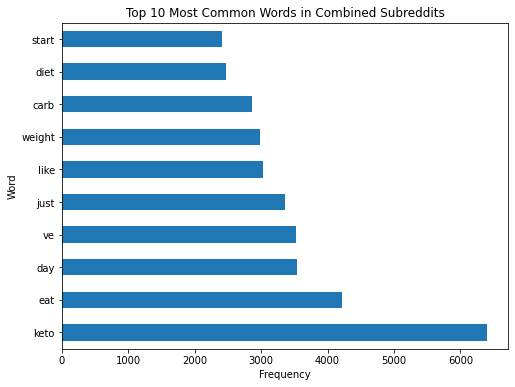

In [46]:
plt.figure(figsize=(8,6))
dtm.sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.title('Top 10 Most Common Words in Combined Subreddits')
plt.xlabel('Frequency')
plt.ylabel('Word');

**-->** 've' is in the top 10 most occuring words, which doesn't tell us much since it's part of a contraction. 'like' and 'know' is also not that meaningful in terms of most common words. Let's clean it up by **adding custom stop words**

In [11]:
# referenced https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list/24386751

from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(['ve', 'like', 'just', 'day', 'don', 'know', 'really', 'does', 'https'])

In [13]:
cvect_stop = CountVectorizer(stop_words = stop_words)
subs_vect = cvect_stop.fit_transform(submissions['clean_selftext'])
dtm = pd.DataFrame(subs_vect.toarray(), columns = cvect_stop.get_feature_names())

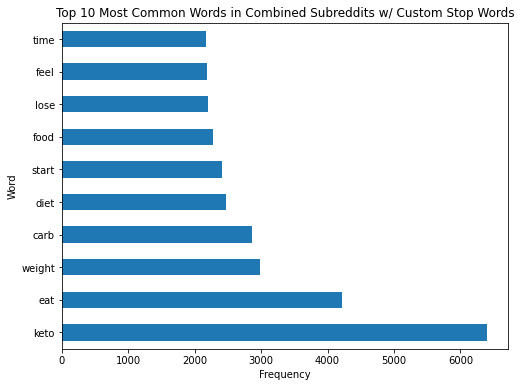

In [51]:
plt.figure(figsize=(8,6))
dtm.sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.title('Top 10 Most Common Words in Combined Subreddits w/ Custom Stop Words')
plt.xlabel('Frequency')
plt.ylabel('Word');

**-->** Despite 'eat' and 'diet' present in both subreddits, majority of the top words derive from r/Keto, as that subreddit has almost twice as many top 10 common words, compared to r/Nutrition

----

## Modeling

### Establish Baseline Accuracy

In [16]:
# binarize target -- subreddit
# keto = 0, nutrition = 1

submissions['subreddit_binary'] = np.where(submissions['subreddit'] == 'keto', 0, 1)

In [59]:
submissions.head()

,subreddit,title,selftext,subreddit_binary,clean_selftext
0,keto,Can stress kick you out of keto? Cortisol ques...,So I've been losing a steady 4 lbs a week for ...,0,so I 've be lose a steady 4 lb a week for the ...
1,keto,down almost 20 lbs before and after pics (slig...,"I'm 23, and 5'6. I was someone who struggled w...",0,"I be 23 , and 5'6 . I be someone who struggle ..."
2,keto,Pulsatile tinnitus and Keto,"I have been doing Keto for around 10 weeks, ha...",0,"I have be do Keto for around 10 week , have lo..."
3,keto,Does Keto Work? (Emphatic Yes),Preface - Over 50 Soldier here. (Male) Deploy...,0,preface - over 50 soldier here . ( Male ) de...
4,keto,Homemade meal replacement type shake recipe thing,I really struggle to get enough calories in on...,0,I really struggle to get enough calorie in on ...


In [20]:
# check to see how balanced our target variable is
# might need to stratify just in case

submissions['subreddit'].value_counts()

keto         3840
nutrition    3070
Name: subreddit, dtype: int64

In [183]:
submissions['subreddit'].value_counts(normalize = True)

keto         0.555716
nutrition    0.444284
Name: subreddit, dtype: float64

**--> The null baseline the model(s) have to score better than is 55.57%**.

### Train Test Split

In [17]:
# establish X + y

X = submissions['clean_selftext']
y = submissions['subreddit_binary']

In [18]:
# tts

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 123)

### Multinomial Naive Bayes w/ CountVectorizer

In [26]:
# NB with Cvect + customized stop_words list

# make pipe
pipe_nb_cvect = make_pipeline(CountVectorizer(stop_words = stop_words), MultinomialNB())

In [27]:
params = {'multinomialnb__alpha': [0.1, 0.5, 0.75, 1.0],
          'countvectorizer__max_features' : [500, 1000, 1500],
          'countvectorizer__ngram_range' : [(1,1), (1,2), (1,3)]}

In [28]:
# gridsearchCV

gs_nb_cvect = GridSearchCV(pipe_nb_cvect, param_grid = params, n_jobs = -1)

gs_nb_cvect.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                              'almost',
                                                                    

In [20]:
# best params?

gs_nb_cvect.best_params_

{'countvectorizer__max_features': 1500,
 'countvectorizer__ngram_range': (1, 3),
 'multinomialnb__alpha': 0.5}

In [21]:
# score

# test score is not bad; scores are consistent

print(f'Train Score: {gs_nb_cvect.score(X_train, y_train)}')
print(f'Test Score: {gs_nb_cvect.score(X_test, y_test)}')

Train Score: 0.8853724430721729
Test Score: 0.8605324074074074


In [22]:
# interpreting CV Scores..
# CV scores are pretty consistent...

cross_val_score(gs_nb_cvect, X_test, y_test)

array([0.85260116, 0.84682081, 0.8150289 , 0.84637681, 0.86086957])

In [64]:
# Analyzing coefs

nb_cvect_coefs = gs_nb_cvect.best_estimator_.named_steps['multinomialnb'].coef_
nb_cvect_features = gs_nb_cvect.best_estimator_.named_steps['countvectorizer'].get_feature_names()
nb_cvect_df = pd.DataFrame({'coefs': nb_cvect_coefs[0], 'word': nb_cvect_features})
nb_cvect_df.nlargest(10, 'coefs')

C:\Users\veron\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


,coefs,word
430,-4.100195,eat
530,-4.332881,food
1084,-4.625753,protein
494,-4.732623,fat
238,-4.771643,calorie
844,-4.771643,make
395,-4.794949,diet
572,-4.801400,good
956,-4.870624,nutrition
1297,-4.891653,sugar


**-->** Words, like *eat*, *food*, and *protein* were the most impactful when classifying a Subreddit Submission post as our binarized 1 class, aka r/Nutrition, based on our positive coefs

In [65]:
nb_cvect_df.nsmallest(10, 'coefs')

,coefs,word
11,-11.633354,13 68
35,-11.633354,2020 week
73,-11.633354,a1c
179,-11.633354,benthamopen
180,-11.633354,benthamopen com
181,-11.633354,benthamopen com fulltext
288,-11.633354,clothe
298,-11.633354,com fulltext
299,-11.633354,com fulltext tobiotj
345,-11.633354,covid


**-->** It doesn't look like these coefs/words tell us much in terms of classifying a Subreddit Submission post as our binarized 0 class, aka r/Keto, based on the negative coefs

In [46]:
# other evaluation metrics

#predictions
nb_cvect_pred = gs_nb_cvect.predict(X_test)

# f1 score
print(f'f1-score: {f1_score(y_test, nb_cvect_pred)}')

# precision score
print(f'precision score: {precision_score(y_test, nb_cvect_pred)}')

# recall score
print(f'recall score: {recall_score(y_test, nb_cvect_pred)}')

f1-score: 0.841967213114754
precision score: 0.8480845442536328
recall score: 0.8359375


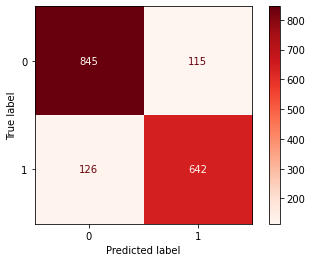

In [49]:
# check out confusion matrix
# 0 = keto; 1 = nutrition

plot_confusion_matrix(gs_nb_cvect, X_test, y_test, cmap = 'Reds');

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, nb_cvect_pred).ravel()

print(f'True Positives: {tp} -- Predicted post as r/Nutrition and post was actually r/Nutrition')
print(f'True Negatives: {tn} -- Predicted post as r/Keto and post was actually r/Keto')
print(f'False Positives: {fp} -- Predicted post as r/Nutrition and post was actually r/Keto')
print(f'False Negatives: {fn} -- Predicted post as r/Keto and post was actually r/Nutrition')

True Positives: 642 -- Predicted post as r/Nutrition and post was actually r/Nutrition
True Negatives: 845 -- Predicted post as r/Keto and post was actually r/Keto
False Positives: 115 -- Predicted post as r/Nutrition and post was actually r/Keto
False Negatives: 126 -- Predicted post as r/Keto and post was actually r/Nutrition


**--> Interpretation**

**Defining Multinomial Naive Bayes:** Taking a step back, **Naive Bayes** models assumes independence between the features and is based off conditional probability. The model is used for text classification. **Multinomial Naive Bayes** is used for discrete features, such as text that is counted and generates probabilities for the counted words

**Defining CountVectorizer:** Counts and returns the occurance of words/features in the given selftext. Returns the most recurring features based on the max_features hyperparameter.

**Rationale:** Multinomial Naive Bayes fits perfectly for our Subreddit classification problem, as we're generating features of words and counting their frequencies, while also looking at the probability of .

**Model Score:** This model can classify the subreddit of Submission posts with 86% accuracy, exceeding our baseline accuracy model of 55%. Cross val scores are consistent and the model is a tad overfit in comparison to our train score.

**Confusion Matrix + Evaluation Metrics:** Of all the True Positives, 16% of them were False Negatives (126), which explains the lower recall score (83.6%), in comparison to the rest of the models that were trained. This model was one of the lowest performing model in terms of recall and f1-scores.

### Multinomial Naive Bayes w/ TfidfVectorizer

In [21]:
# NB with Tfidf + customized stop_words list

pipe_nb_tfidf = make_pipeline(TfidfVectorizer(stop_words = stop_words), MultinomialNB())

In [22]:
params = {'multinomialnb__alpha': [0.1, 0.5, 0.75, 1.0],
          'tfidfvectorizer__ngram_range' : [(1,1), (1,2)], 
          'tfidfvectorizer__max_features' : [500, 1000, 1500]}

In [23]:
# gridsearchCV

gs_nb_tfidf = GridSearchCV(pipe_nb_tfidf, param_grid = params, n_jobs = -1)

gs_nb_tfidf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                              'almost',
                                                                    

In [26]:
# best params?

gs_nb_tfidf.best_params_

{'multinomialnb__alpha': 0.1,
 'tfidfvectorizer__max_features': 1500,
 'tfidfvectorizer__ngram_range': (1, 2)}

In [27]:
# score

# cvect was better

print(f'Train Score: {gs_nb_tfidf.score(X_train, y_train)}')
print(f'Test Score: {gs_nb_tfidf.score(X_test, y_test)}')

Train Score: 0.8774604399845619
Test Score: 0.8483796296296297


In [28]:
# interpreting CV Scores..
# like cvect, CV scores are pretty consistent as well...

cross_val_score(gs_nb_tfidf, X_test, y_test)

array([0.84393064, 0.81791908, 0.80346821, 0.84057971, 0.85217391])

In [60]:
# Analyzing coefs

nb_tfidf_coefs = gs_nb_tfidf.best_estimator_.named_steps['multinomialnb'].coef_
nb_tfidf_features = gs_nb_tfidf.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
nb_tfidf_df = pd.DataFrame({'coefs': nb_tfidf_coefs[0], 'word': nb_tfidf_features})
nb_tfidf_df.nlargest(10, 'coefs')

C:\Users\veron\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


,coefs,word
434,-4.720479,eat
534,-4.742692,food
1084,-4.969987,protein
954,-4.986456,nutrition
576,-5.060704,good
628,-5.091160,healthy
1420,-5.094986,vitamin
238,-5.100466,calorie
1296,-5.149608,sugar
498,-5.204435,fat


**-->** Words, like *eat*, *food*, and *protein* were the most impactful when classifying a Subreddit Submission post as our binarized 1 class, aka r/Nutrition, based on our positive coefs

In [62]:
nb_tfidf_df.nsmallest(10, 'coefs')

,coefs,word
11,-11.353118,13 68
35,-11.353118,2020 week
48,-11.353118,2nd
74,-11.353118,a1c
180,-11.353118,benthamopen
181,-11.353118,benthamopen com
291,-11.353118,clothe
301,-11.353118,com fulltext
348,-11.353118,covid
362,-11.353118,cw


**-->** Like the CountVectorizer Multinomial Naive Bayes model, it doesn't look like these coefs/words tell us much in terms of classifying a Subreddit Submission post as our binarized 0 class, aka r/Keto, based on the negative coefs

In [27]:
# other evaluation metrics

#predictions
nb_tfidf_pred = gs_nb_tfidf.predict(X_test)

# f1 score
print(f'f1-score: {f1_score(y_test, nb_tfidf_pred)}')

# precision score
print(f'precision score: {precision_score(y_test, nb_tfidf_pred)}')

# recall score
print(f'recall score: {recall_score(y_test, nb_tfidf_pred)}')

f1-score: 0.8227334235453314
precision score: 0.856338028169014
recall score: 0.7916666666666666


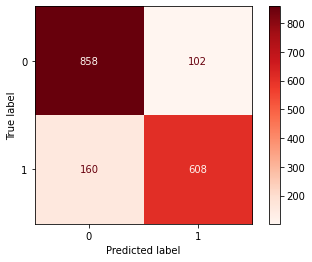

In [45]:
# check out confusion matrix
# 0 = keto; 1 = nutrition

plot_confusion_matrix(gs_nb_tfidf, X_test, y_test, cmap = 'Reds');

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, nb_tfidf_pred).ravel()

print(f'True Positives: {tp} -- Predicted post as r/Nutrition and post was actually r/Nutrition')
print(f'True Negatives: {tn} -- Predicted post as r/Keto and post was actually r/Keto')
print(f'False Positives: {fp} -- Predicted post as r/Nutrition and post was actually r/Keto')
print(f'False Negatives: {fn} -- Predicted post as r/Keto and post was actually r/Nutrition')

True Positives: 608 -- Predicted post as r/Nutrition and post was actually r/Nutrition
True Negatives: 858 -- Predicted post as r/Keto and post was actually r/Keto
False Positives: 102 -- Predicted post as r/Nutrition and post was actually r/Keto
False Negatives: 160 -- Predicted post as r/Keto and post was actually r/Nutrition


**--> Brief Interpretation**

**Defining Multinomial Naive Bayes:** Taking a step back, **Naive Bayes** models assumes independence between the features and is based off conditional probability. The model is used for text classification. **Multinomial Naive Bayes** is used for discrete features, such as text that is counted and generates probabilities for the counted words

**Defining TfidfVectorizer:** Counts and returns the occurance of words/features in the given selftext. Penalizes the most recurring features and gives greater weight to features that don't occur as frequent in other documents throughout the bag-of-words / corpus.

**Rationale:** I chose Logistic Regression because it's a fairly simple model overall and can be used for multiclass classifications as well, despite this project having a binary target variable. 

**Model Score:** This model can classify the subreddit of Submission posts with 91% accuracy, exceeding our baseline accuracy model of 55%. Cross val scores are consistent and the model is slightly overfit in comparison to our train score.

**Confusion Matrix + Evaluation Metrics:** Of all the True Positives, 20% of them were False Negatives (160), which explains the lowest recall score (79%), in comparison to the rest of the models that were trained. This model was the lowest performing model in terms of recall and f1-scores.

### Logistic Regression w/ CountVectorizer

In [32]:
# LR with CountVect + customized stop_words list

pipe_lr_cvect = make_pipeline(CountVectorizer(stop_words = stop_words), LogisticRegression(max_iter = 1000))

In [33]:
params = {'countvectorizer__ngram_range' : [(1,1), (1,2)], 
          'countvectorizer__max_features' : [100, 1000, 1500], 
          'logisticregression__C': [.1, .5, .75, 1]}

In [34]:
# gridsearchCV

gs_lr_cvect = GridSearchCV(pipe_lr_cvect, param_grid = params, n_jobs = -1)

gs_lr_cvect.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                              'almost',
                                                                    

In [127]:
# best params?

gs_lr_cvect.best_params_

{'countvectorizer__max_features': 1500,
 'countvectorizer__ngram_range': (1, 2),
 'logisticregression__C': 0.1}

In [128]:
# score

# better than bayes..Scores are somewhat consistent, with slight overfit

print(f'Train Score: {gs_lr_cvect.score(X_train, y_train)}')
print(f'Test Score: {gs_lr_cvect.score(X_test, y_test)}')

Train Score: 0.95021227325357
Test Score: 0.9079861111111112


In [129]:
# interpreting CV Scores..
# CV scores are pretty consistent as well...

cross_val_score(gs_lr_cvect, X_test, y_test)

array([0.86705202, 0.89306358, 0.9132948 , 0.88405797, 0.90434783])

In [57]:
# Analyzing coefs

lr_cvect_coefs = gs_lr_cvect.best_estimator_.named_steps['logisticregression'].coef_
lr_cvect_features = gs_lr_cvect.best_estimator_.named_steps['countvectorizer'].get_feature_names()
lr_cvect_df = pd.DataFrame({'coefs': lr_cvect_coefs[0], 'word': lr_cvect_features})
lr_cvect_df.nlargest(10, 'coefs')

,coefs,word
628,0.904795,healthy
954,0.696255,nutrition
137,0.653322,articles
1420,0.555014,vitamin
179,0.510574,benefit
455,0.488792,energy
953,0.478410,nutrient
960,0.451149,oats
83,0.450166,acid
626,0.421466,health


**-->** Words, like *healthy*, *nutrition*, and *articles* were the most impactful when classifying a Subreddit Submission post as our binarized 1 class, aka r/Nutrition, based on our positive coefs

In [63]:
lr_cvect_df.nsmallest(10, 'coefs')

,coefs,word
728,-2.784599,keto
752,-0.775751,ketosis
678,-0.588181,imgur
679,-0.576509,imgur com
751,-0.566691,ketone
243,-0.553342,carb
931,-0.546627,net
172,-0.533124,beef
273,-0.527754,cheese
932,-0.506580,net carb


**-->** Words, like *keto*, *ketosis*, and *imgur* were the most impactful when classifying a Subreddit Submission post as our binarized 0 class, aka r/Keto, based on the negative coefs. Digging deeper, 'imgur' looks to be an image sharing source/site. Perhaps people were sharing images of their keto dishes

In [41]:
# other evaluation metrics

#predictions
lr_cvect_pred = gs_lr_cvect.predict(X_test)

# f1 score
print(f'f1-score: {f1_score(y_test, lr_cvect_pred)}')

# precision score
print(f'precision score: {precision_score(y_test, lr_cvect_pred)}')

# recall score
print(f'recall score: {recall_score(y_test, lr_cvect_pred)}')

f1-score: 0.8998109640831758
precision score: 0.8717948717948718
recall score: 0.9296875


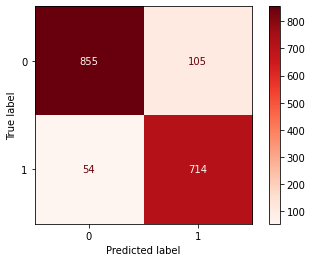

In [42]:
# check out confusion matrix
# 0 = keto; 1 = nutrition

plot_confusion_matrix(gs_lr_cvect, X_test, y_test, cmap = 'Reds');

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_cvect_pred).ravel()

print(f'True Positives: {tp} -- Predicted post as r/Nutrition and post was actually r/Nutrition')
print(f'True Negatives: {tn} -- Predicted post as r/Keto and post was actually r/Keto')
print(f'False Positives: {fp} -- Predicted post as r/Nutrition and post was actually r/Keto')
print(f'False Negatives: {fn} -- Predicted post as r/Keto and post was actually r/Nutrition')

True Positives: 714 -- Predicted post as r/Nutrition and post was actually r/Nutrition
True Negatives: 855 -- Predicted post as r/Keto and post was actually r/Keto
False Positives: 105 -- Predicted post as r/Nutrition and post was actually r/Keto
False Negatives: 54 -- Predicted post as r/Keto and post was actually r/Nutrition


**--> Brief Interpretation**

**Defining Logistic Regression:** Similar to Linear Regression in a sense of looking at how the independent variables (X) affect the dependent variable (y), only our target variable is binarized.

**Defining CountVectorizer:** Counts and returns the occurance of words/features in the given selftext. Returns the most recurring features based on the max_features hyperparameter.

**Rationale:** I chose Logistic Regression because it's a fairly simple model overall and can be used for multiclass classifications as well, despite this project having a binary target variable. 

**Model Score:** This model can classify the subreddit of Submission posts with 90.8% accuracy, exceeding our baseline accuracy model of 55%. This model was one of the better scoring models compared to the ones that were tested. Cross val scores are consistent and the model is slightly overfit in comparison to our train score.

**Confusion Matrix + Evaluation Metrics:** The confusion matrix had relatively high True Positives and True Negatives, resulting in the second best precision, recall, and f1-score scores.

### Logistic Regression w/ TfidfVectorizer (BEST MODEL)

In [12]:
# LR with Tfidf + customized stop_words list

pipe_lr_tfidf = make_pipeline(TfidfVectorizer(stop_words = stop_words), LogisticRegression(max_iter = 1000))

In [13]:
params = {'tfidfvectorizer__ngram_range' : [(1,1), (1,2), (1,3)], 
          'tfidfvectorizer__max_features' : [100, 1000, 1500], 
          'logisticregression__C': [.01, .1, 1, 10]}

In [19]:
# gridsearchCV

gs_lr_tfidf = GridSearchCV(pipe_lr_tfidf, param_grid = params, n_jobs = -1)

gs_lr_tfidf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                              'almost',
                                                                    

In [20]:
# best params?

gs_lr_tfidf.best_params_

{'logisticregression__C': 1,
 'tfidfvectorizer__max_features': 1000,
 'tfidfvectorizer__ngram_range': (1, 2)}

In [111]:
# BEST MODEL
# score

# performed just as well as LR with cvect, but cvect did a smidge better...scores are pretty consistent as well

print(f'Train Score: {gs_lr_tfidf.score(X_train, y_train)}')
print(f'Test Score: {gs_lr_tfidf.score(X_test, y_test)}')

Train Score: 0.932651485912775
Test Score: 0.9114583333333334


In [112]:
# interpreting CV Scores..
# CV scores are pretty consistent as well...

cross_val_score(gs_lr_tfidf, X_test, y_test)

array([0.89306358, 0.87861272, 0.89017341, 0.87826087, 0.89565217])

In [51]:
# Analyzing coefs

lr_tfidf_coefs = gs_lr_tfidf.best_estimator_.named_steps['logisticregression'].coef_
lr_tfidf_features = gs_lr_tfidf.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names()
lr_tfidf_df = pd.DataFrame({'coefs': lr_tfidf_coefs[0], 'word': lr_tfidf_features})
lr_tfidf_df.nlargest(10, 'coefs')

,coefs,word
419,3.439245,healthy
642,3.148932,nutrition
944,2.405725,vitamin
641,2.015126,nutrient
49,1.586264,acid
357,1.531348,food
644,1.409822,oats
418,1.340343,health
115,1.292597,benefit
157,1.182318,calorie


**-->** Words, like *healthy*, *nutrition*, and *vitamin* were the most impactful when classifying a Subreddit Submission post as our binarized 1 class, aka r/Nutrition, based on our positive coefs

In [52]:
lr_tfidf_df.nsmallest(10, 'coefs')

,coefs,word
488,-15.183263,keto
161,-3.994094,carb
501,-3.169067,ketosis
960,-2.575778,week
837,-2.408605,start
839,-2.216053,start keto
625,-2.212248,net
626,-2.068148,net carb
611,-2.065897,month
547,-2.026486,lose


**-->** Words, like *keto*, *carb*, and *ketosis* were the most impactful when classifying a Subreddit Submission post as our binarized 0 class, aka r/Keto, based on the negative coefs

In [70]:
# make train / test predictions
lr_tfidf_pred2 = gs_lr_tfidf.predict(X_test)

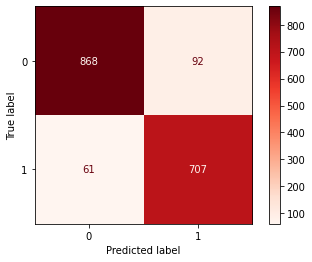

In [55]:
# check out confusion matrix
# 0 = keto; 1 = nutrition

plot_confusion_matrix(gs_lr_tfidf, X_test, y_test, cmap = 'Reds');

In [57]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_tfidf_pred2).ravel()

print(f'True Positives: {tp} -- Predicted post as r/Nutrition and post was actually r/Nutrition')
print(f'True Negatives: {tn} -- Predicted post as r/Keto and post was actually r/Keto')
print(f'False Positives: {fp} -- Predicted post as r/Nutrition and post was actually r/Keto')
print(f'False Negatives: {fn} -- Predicted post as r/Keto and post was actually r/Nutrition')

True Positives: 707 -- Predicted post as r/Nutrition and post was actually r/Nutrition
True Negatives: 868 -- Predicted post as r/Keto and post was actually r/Keto
False Positives: 92 -- Predicted post as r/Nutrition and post was actually r/Keto
False Negatives: 61 -- Predicted post as r/Keto and post was actually r/Nutrition


In [24]:
# other evaluation metrics

# f1 score
print(f'f1-score: {f1_score(y_test, lr_tfidf_pred2)}')

# precision score
print(f'precision score: {precision_score(y_test, lr_tfidf_pred2)}')

# recall score
print(f'recall score: {recall_score(y_test, lr_tfidf_pred2)}')

f1-score: 0.902361199744735
precision score: 0.8848560700876095
recall score: 0.9205729166666666


#### **--> Brief Interpretation (BEST MODEL)**

**Defining Logistic Regression:** Similar to Linear Regression in a sense of looking at how the independent variables (X) affect the dependent variable (y), only our target variable is discrete and binarized.

**Defining TfidfVectorizer:** Counts and returns the occurance of words/features in the given selftext. Penalizes the most recurring features and gives greater weight to features that don't occur as frequent in other documents throughout the bag-of-words / corpus.

**Rationale:** I chose Logistic Regression because it's a fairly simple model overall and can be used for multiclass classifications as well, despite this project having a binary target variable. 

**Model Score:** This model can classify the subreddit of Submission posts with 91% accuracy, exceeding our baseline accuracy model of 55%. Cross val scores are consistent and the model is slightly overfit in comparison to our train score.

**Confusion Matrix + Evaluation Metrics:** Compared to the other models that were tested, this model had the highest True Negatives and the lowest False positives. Additionally, the lowest False positives led to the highest precision scores amongst the models tested. This model also had the highest f1-score.

### Random Forest w/ Count Vectorization

In [35]:
# Random Forest with cvect + customized stop_words list

pipe_forest_cvect = make_pipeline(CountVectorizer(stop_words = stop_words), RandomForestClassifier())

In [36]:
params = {'countvectorizer__ngram_range' : [(1,1), (1,2)], 
          'countvectorizer__max_features' : [100, 1000, 1500], 
          'randomforestclassifier__max_depth': [2, 3, 4, 5],
          'randomforestclassifier__max_features' : [10, 20, 30]}

In [37]:
# gridsearchCV

gs_forest_cvect = GridSearchCV(pipe_forest_cvect, param_grid = params, n_jobs = -1)

gs_forest_cvect.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                              'almost',
                                                                    

In [116]:
# best params?

gs_forest_cvect.best_params_

{'countvectorizer__max_features': 100,
 'countvectorizer__ngram_range': (1, 1),
 'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__max_features': 20}

In [117]:
# score

# scores are pretty consistent, not our lowest model score, but still not as good as our best model -- Tfidf + LR

print(f'Train Score: {gs_forest_cvect.score(X_train, y_train)}')
print(f'Test Score: {gs_forest_cvect.score(X_test, y_test)}')

Train Score: 0.9023543033577769
Test Score: 0.8877314814814815


In [118]:
# interpreting CV Scores..
# CV scores are pretty consistent as well...

cross_val_score(gs_forest_cvect, X_test, y_test)

array([0.8699422 , 0.87283237, 0.9017341 , 0.89565217, 0.88115942])

In [38]:
# other evaluation metrics

#predictions
forest_cvect_pred = gs_forest_cvect.predict(X_test)

# f1 score
print(f'f1-score: {f1_score(y_test, forest_cvect_pred)}')

# precision score
print(f'precision score: {precision_score(y_test, forest_cvect_pred)}')

# recall score
print(f'recall score: {recall_score(y_test, forest_cvect_pred)}')

f1-score: 0.8849665246500305
precision score: 0.8308571428571428
recall score: 0.9466145833333334


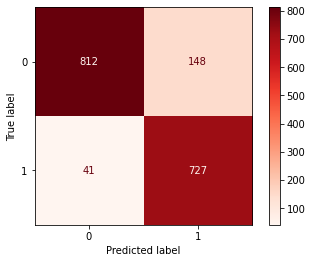

In [39]:
# check out confusion matrix
# 0 = keto; 1 = nutrition

plot_confusion_matrix(gs_forest_cvect, X_test, y_test, cmap = 'Reds');

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, forest_cvect_pred).ravel()

print(f'True Positives: {tp} -- Predicted post as r/Nutrition and post was actually r/Nutrition')
print(f'True Negatives: {tn} -- Predicted post as r/Keto and post was actually r/Keto')
print(f'False Positives: {fp} -- Predicted post as r/Nutrition and post was actually r/Keto')
print(f'False Negatives: {fn} -- Predicted post as r/Keto and post was actually r/Nutrition')

True Positives: 727 -- Predicted post as r/Nutrition and post was actually r/Nutrition
True Negatives: 812 -- Predicted post as r/Keto and post was actually r/Keto
False Positives: 148 -- Predicted post as r/Nutrition and post was actually r/Keto
False Negatives: 41 -- Predicted post as r/Keto and post was actually r/Nutrition


**--> Brief Interpretation**

**Defining Random Forest Classifier:** Let's take a step back and define a Decision Tree. Decision Tree uses Gini impurity to determine the optimal feature at each split to get the data to its purest form. With **Random Forest Classifier**, the decision trees are exposed to different sub-samples of the training data, selecting random subsets of the features at each split point of the tree

**Defining CountVectorizer:** Counts and returns the occurance of words/features in the given selftext. Returns the most recurring features based on the max_features hyperparameter.

**Rationale:** I chose Random Forest Classifier because it reduces the variance from decision trees by 'de-correlating' trees using the random subsets of features, whereas decision trees would look at each feature every time, causing that high correlation among the trees

**Model Score:** This model can classify the subreddit of Submission posts with 88.77% accuracy, exceeding our baseline accuracy model of 55%. A great score, but not our best one. Cross val scores are consistent and the model is just a tad overfit in comparison to our train score.

**Confusion Matrix + Evaluation Metrics:** Of the positive predicted values, the model predicted 20% of them as false positives, which explains the lower precision score, in comparison to the rest of the models that were trained

---

### Conclusion

The best performing model was **Logistic Regression, used with TF-IDF Vectorizer**. This model can classify the subreddit of Submission posts with 91% accuracy, exceeding our baseline accuracy score of 55%. The parameters that performed best for this model included English stop_words, with additional irrelevant custom stop words (e.g. "'ve", "really", "just"), max_features of 1000, and an ngram_range of (1,2). Compared to the other models that were tested, this model had the highest True Negatives and the lowest False positives. Additionally, the lowest False positives led to the highest precision scores amongst the models tested. This model also had the highest f1-score.

The top 5 words within a selftext that best distinguished r/Nutrition submission posts included 'eat', 'food', 'protein', 'fat', 'calorie'. The top 5 words within a selftext that best distinguised r/Keto Submission posts include 'keto', 'eat', 'weight', 'carb', 'start'. Despite 'eat' and 'diet' being present in both subreddits, majority of the top words from the combined datafram of r/Nutrition and r/Keto derived from r/Keto, as that subreddit had almost twice as many top 10 common words, compared to r/Nutrition.

When comparing each model's accuracy score against one another, the Multinomial Naive Bayes models scored the lowest, followed by Random Forest Classifier, and finally, the Logistic Regression models performed the best. Additionally, comparing each models' confusion matrices, both Naive Bayes CountVectorizer + TfidfVectorizer models predicted the lowest number of True Positives and almost twice as many False Negatives, resulting in the lowest precision, recall, and f1-score scores of the models tested.

### Recommendations
- Lemmatize words prior to analyzation so that the model doesn't count instances of the root word ('eat', 'eats', 'eating') separately. Lemmatizing would also optimize the model in terms of finding different patterns of words.
- Look at different ngram_ranges to see what patterns of words occur the most frequent so that the model can train on those patterns.

### Future Project Refinements

- Look at other/combination of features, such as 'comments', or 'title'
- Add to `stop_words` list (Ex. 'keto')
- Build and evaluate additional models (DecisionTree, KNeighborsClassifier)